In [3]:
from darkflow.net.build import TFNet

In [2]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
%config InlineBackend.figure_format = 'svg'

In [6]:
options = { 
'model' : 'cfg/yolo.cfg',
'load' : 'bin/yolo.weights',
'threshold': 0.3}
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.10323023796081543s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

In [23]:
img = cv2.imread('person.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(img)


In [15]:
tl1 = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br1 = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label1 = result[0]['label']

In [16]:
tl2 = (result[1]['topleft']['x'], result[1]['topleft']['y'])
br2 = (result[1]['bottomright']['x'], result[1]['bottomright']['y'])
label2 = result[1]['label']

In [17]:
tl3 = (result[2]['topleft']['x'], result[2]['topleft']['y'])
br3 = (result[2]['bottomright']['x'], result[2]['bottomright']['y'])
label3 = result[2]['label']

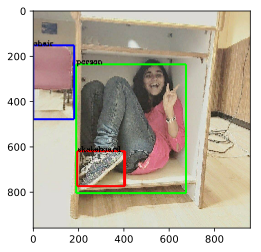

In [24]:
img = cv2.rectangle(img, tl1, br1, (0, 255, 0), 7)
img = cv2.rectangle(img, tl2, br2, (255, 0, 0), 7)
img = cv2.rectangle(img, tl3, br3, (0, 0, 255), 7)
img = cv2.putText(img, label1, tl1, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
img = cv2.putText(img, label2, tl2, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
img = cv2.putText(img, label3, tl3, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()
